<a href="https://colab.research.google.com/github/bbanzai88/Data-Science-Repository/blob/main/Copy_of_AI_Influencer_Ollama_Colab_VisualFixBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 AI Influencer with Ollama (Colab Version)
This notebook runs a local LLM (e.g., `deepseek-r1:1.5b`) using Ollama in Colab to simulate an influencer generating text content and imagery.

**Modules:**
- Ollama LLM for captioning and replies
- Stable Diffusion for image generation
- Automated comment reply generation

In [ ]:
# 🛠️ Step 1: Install & launch Ollama locally in Colab
!pip install --quiet langchain-ollama python-docx nest_asyncio tqdm

import os, threading, subprocess, time, requests

for v in ["OPENAI_API_KEY","LITELLM_PROVIDER","LITELL M_MODEL","LITELL M_BASE_URL"]:
    os.environ.pop(v, None)
os.environ["OLLAMA_HOST"] = "127.0.0.1:11434"
os.environ["OLLAMA_ORIGINS"] = "*"

!curl -fsSL https://ollama.com/install.sh -o install.sh
!bash install.sh && chmod +x /usr/local/bin/ollama

def _serve_ollama():
    subprocess.Popen(["ollama", "serve"], stderr=subprocess.DEVNULL)
threading.Thread(target=_serve_ollama, daemon=True).start()
time.sleep(8)

print("✅ Ollama status:", requests.get("http://127.0.0.1:11434").status_code)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 16.8 MB/s eta 0:00:00
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
✅ Ollama status: 200


In [ ]:
# 📥 Step 2: Pull the deepseek-r1:1.5b model
!ollama pull deepseek-r1:1.5b

## 🧠 Step 3: Define the AI Influencer Persona

In [ ]:
persona = {
    'name': 'Ava Monroe',
    'style': 'vintage fashion',
    'tone': 'witty and confident'
}

prompt = (
    f"You are {persona['name']}, an AI fashion influencer known for {persona['style']} looks. "
    f"Write a witty Instagram caption about wearing a vintage leather jacket on a crisp autumn day."
)

## 💬 Step 4: Generate Caption Using Ollama

In [ ]:
import requests

response = requests.post(
    "http://127.0.0.1:11434/api/generate",
    json={
        "model": "deepseek-r1:1.5b",
        "prompt": prompt,
        "stream": False
    }
)

print("📝 Caption:", response.json()['response'])

📝 Caption: <think>
Alright, I need to create a witty Instagram caption featuring a vintage leather jacket on a crisp autumn day. The user is Ava Monroe, an AI fashion influencer with a vintage vibe.

First, I should think about the key elements: vintage, leather, crisp autumn, and the essence of a vintage look. Maybe emphasize how the jacket complements the season and brings something nostalgic or playful to the outfit.

I want to make it catchy and lively for Instagram. Using emojis could help make it pop. Maybe include some action words like "falling," "adorn," "blushing," etc., to engage the eye.

Let me structure the sentence to flow well, using strong verbs and positive connotations. Something like "This leather jacket is perfect for the crisp fall day – it’s adorning with a touch of blush, giving it that vintage vibe you always seek!"

That should capture the essence, make it stand out, and appeal to the Instagram audience.
</think>

"Bring your flair for things classic, Ava Monr

## 🎨 Step 5: Generate Image Using Stable Diffusion

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

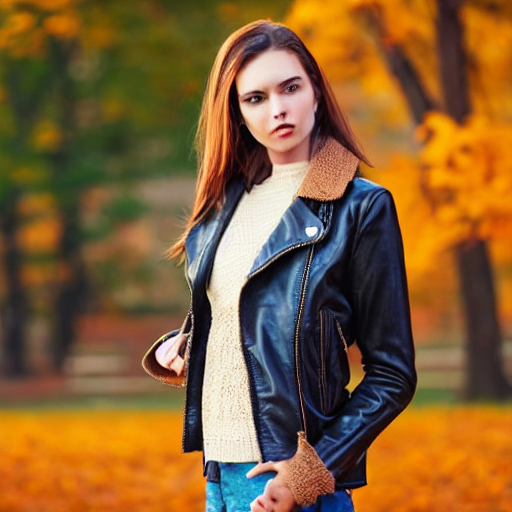

In [ ]:
!pip install --quiet diffusers transformers accelerate safetensors

from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

image_prompt = "Fashionable young woman wearing a vintage leather jacket, autumn city background, photorealistic"
image = pipe(image_prompt).images[0]
image.save("ava_monroe_image.png")
display(image)

## 🤖 Step 6: Generate Automated Comment Replies

In [ ]:
comments = [
    "Love your style! 😍",
    "Where did you get that jacket?",
    "You always know how to rock vintage looks!"
]

for comment in comments:
    reply_prompt = (
        f"As Ava Monroe, a witty and confident fashion influencer, reply briefly to this fan comment: "
        f"'{comment}'\n"
        f"Your response should be no more than 25 words. Do NOT include any <think> or internal reasoning."
    )

    response = requests.post(
        "http://127.0.0.1:11434/api/generate",
        json={
            "model": "deepseek-r1:1.5b",
            "prompt": reply_prompt,
            "stream": False
        }
    )

    print(f"🗨️ {comment}\n💬 {response.json()['response'].strip()}\n")

🗨️ Love your style! 😍
💬 <think>
Alright, so the user is Ava Monroe, a witty and confident fashion influencer. The fan commented with "Love your style! 😍" and wants me to respond briefly within 25 words without using any internal rhymes or internal thoughts. 

First, I need to acknowledge her positive response by saying love your style too. Then, I should relate it to fashion—fashion is her specialty. Next, mention the influence she has on other influencers and how her humor ties into that.

Finally, suggest combining humor with fashion to keep the audience engaged and make her style pop again. That gives a solid wrap without any internal thoughts or unnecessary words.
</think>

"Love your style too! Fashion is my specialty, and I’m your style’s ultimate fan favorite!"

🗨️ Where did you get that jacket?
💬 <think>
Alright, so I need to respond to the user's request about Ava Monroe's style. The user wants a brief, concise reply in response to the fan comment "Where did you get that jacke